## Anomaly Detection Assignment

Study the notebook `Study_Case_Anomoly_Detection` 

Choose at least 1 out of the listed assignments below

1. Analyze the end result plot to evaluate the algorithm's performance. Look for anomalies identified by the algorithm and compare them to known anomalies or instances of abnormal behavior in the data. Assess whether the algorithm successfully captures these anomalies and if it shows promising results in detecting abnormal patterns. Based on the plot analysis, provide argumentation for the validity of the anomaly detection algorithm hypothesis (see above). Discuss how the algorithm effectively captures anomalies in the time series data and why it is a suitable approach for the use case. Support your argument with references to relevant literature that discuss the effectiveness of the chosen algorithm or similar algorithms in detecting anomalies in time series data.


2. To improve data quality for anomaly detection in time series data, we can focus on removing outliers due to sensor reading errors while preserving anomalies. Additionally, performing resampling or aggregation can help reduce noise and highlight higher-level patterns relevant for anomaly detection. Find common steps to improve data quality for this particular use and implement those. Evaluate the performance of the algorithms compare to the original notebook.


3. Try another algorithm that has not been tested in the notebook. Provide argumentation for the validity of the anomaly detection algorithm you choose.


4. Try to find the best configuration for one of the tested algorithms

5. Try anomaly detection on a different dataset without timeseries data. Intrepret the results

Do not forget to reference sources!


## <span style="color:green">solution</span>

1. From the plot, it can be observed that the Isolation Forest algorithm successfully identified anomalies near the broken points, indicating the algorithm is capable of identifying deviations in the sensor readings that could be indicative of a machine failure. However, the algorithm also flags some points during normal operation as anomalies, demonstrating potential false positives.

3. Base on https://aiblog.co.za/technology/elliptic-envelope-anomaly-detection paper
I toght elliptic envelope anomaly detection might work fine for this data set as
The Elliptic Envelope method is based on the principle that the regular data often follow a Gaussian distribution (or normal distribution) quite closely. In other words, it assumes that the data is normally distributed and thus the anomalies are the observations that reside in the low probability areas of this Gaussian distribution.

Some reasons why the Elliptic Envelope might be suitable for your dataset are:

Handling Multivariate Data: Elliptic Envelope can handle multivariate data efficiently. If your dataset contains readings from multiple sensors and these readings interact in complex ways, the Elliptic Envelope can capture these interactions.


Assumption of Gaussian distribution: If the data from your sensors is normally distributed or close to it, then the Elliptic Envelope is a good choice. It works by fitting an ellipse to the central data points, and data points outside this 'envelope' are considered anomalies.

Efficiency: The method is relatively straightforward and computationally efficient compared to some other methods, making it a good choice for large datasets or real-time applications.


** I was not sure if the data  is Gaussian distribuation or not but I tought testing the algorithm worth the try**

Unfortunately the algorithm did not work very well





4. Try to find the best configuration for one of the tested algorithms

I try to find the best configuration for **Isolation Forest** as it perform betther than other algorithms
the parameters for this algorithm are:

**n_estimators:**
This parameter determines the number of trees in the forest. A larger number of trees can improve the anomaly detection performance but also increase the computation time. As a starting point, you could try a value of 100 or 200, but you might want to adjust this number based on your computational resources and the size of your dataset.

**max_samples:**
 This parameter controls the number of samples to draw from the dataset to train each base estimator. If you're dealing with a large dataset, setting this parameter to a float indicating a fraction of the dataset could be a good idea to speed up the training process. For smaller datasets, the default value "auto" (which corresponds to min(256, n_samples)) might be appropriate.

**contamination:**
 This parameter controls the proportion of outliers in the dataset. It's used to define the threshold for deciding if an observation is an outlier or not. If you have prior knowledge about the proportion of anomalies in your dataset, you could set this parameter accordingly. Otherwise, you might need to experiment with different values. Typical values could be in the range of 0.1 to 0.2.

**bootstrap:** This parameter controls whether or not to use bootstrapped samples (i.e., samples drawn with replacement) when building the trees. If the dataset contains redundant information (i.e., correlated features), setting this parameter to True might improve the performance.


A common method for this is grid search, where you specify a set of potential values for each hyperparameter, and then evaluate the performance of the model for each combination of hyperparameters. but it  is only for supervised learning

 Isolation Forest is used for unsupervised learning problems, and specifically, it is an anomaly detection algorithm. In such scenarios, we usually don't have a target variable y.

The process of hyperparameter tuning remains similar, but since we don't have a target variable to evaluate the model's performance, we can't directly use methods like GridSearchCV. However, we can perform a manual search over the hyperparameters and evaluate the models based on an alternative metric. In our case we just compare the plotting and try to see how good the algorithm works


| Parameter     | Values      |
| ------------- |-------------|
| n_estimators  | 50, 100, 150, 200 |
| max_samples   | 'auto', 0.5, 0.75, 0.9 |
| contamination | 0.1, 0.2, 0.3 |
| bootstrap     | True, False |
| Sensors       | sensor_01, sensor_02, sensor_03 |


After looking over all of the output data, which includes 296 plots located in a different file due to size constraints, it's clear that the Isolation Forest algorithm isn't working well in this case. There are too many false positives.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data
## source: https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
path = "/Users/Hesam_1/Library/CloudStorage/OneDrive-HanzehogeschoolGroningen/Semester2/MachineLearning/Data/sensor.csv"
df = pd.read_csv(path)
df_original = df.copy()

In [4]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
#shape of the data
df.shape

(220320, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
#Check the stautus of the pump
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [8]:
#check for missing values
missing_values_percentages = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_values_percentages.head(10)

sensor_15    1.000000
sensor_50    0.349569
sensor_51    0.069821
sensor_00    0.046333
sensor_07    0.024741
sensor_08    0.023180
sensor_06    0.021777
sensor_09    0.020856
sensor_01    0.001675
sensor_30    0.001185
dtype: float64

In [9]:
#drop the columns with more than 10% missing values
df = df.dropna(thresh = len(df)*0.9, axis=1)
df.shape

(220320, 53)

In [10]:
#check for missing values again
missing_values_percentages = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_values_percentages.head(10)

sensor_51    0.069821
sensor_00    0.046333
sensor_07    0.024741
sensor_08    0.023180
sensor_06    0.021777
sensor_09    0.020856
sensor_01    0.001675
sensor_30    0.001185
sensor_29    0.000327
sensor_32    0.000309
dtype: float64

In [11]:
#Turn the timestamp into a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
#Set the timestamp as the index
df.set_index('timestamp', inplace=True)

In [12]:
#visualize the data
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']
def plot_sensor(sensor):
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering')
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14, label = 'broken')
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

In [22]:
broken_rows = df[df['machine_status']=='BROKEN']
recovery_rows = df[df['machine_status']=='RECOVERING']
normal_rows = df[df['machine_status']=='NORMAL']
#portiono of anomal
print('Portion of anomalies: ', len(broken_rows) /len(df)*100, '%')

Portion of anomalies:  0.003177196804647785 %


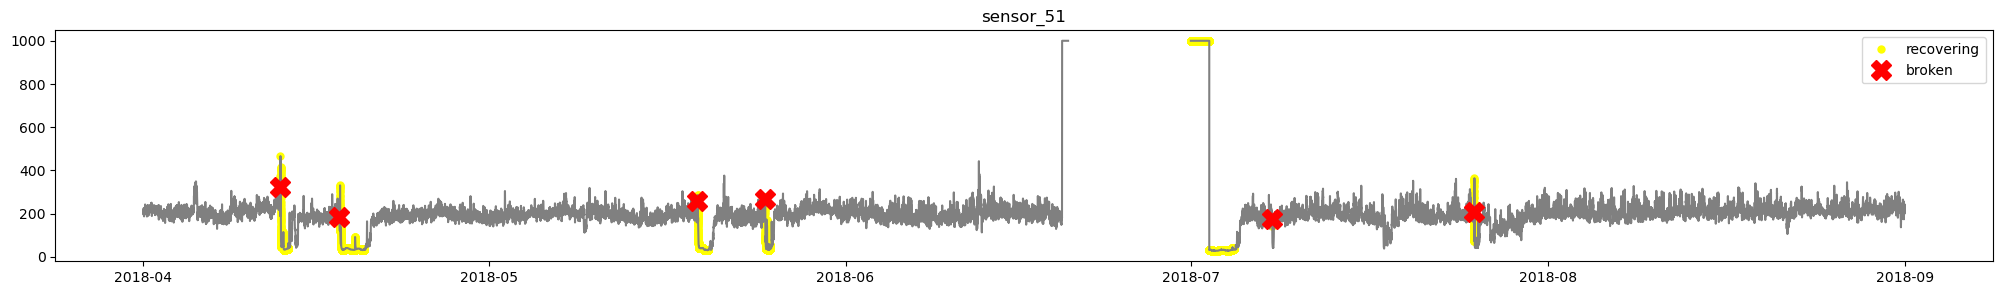

In [14]:
# plot sensor 51
plot_sensor('sensor_51')

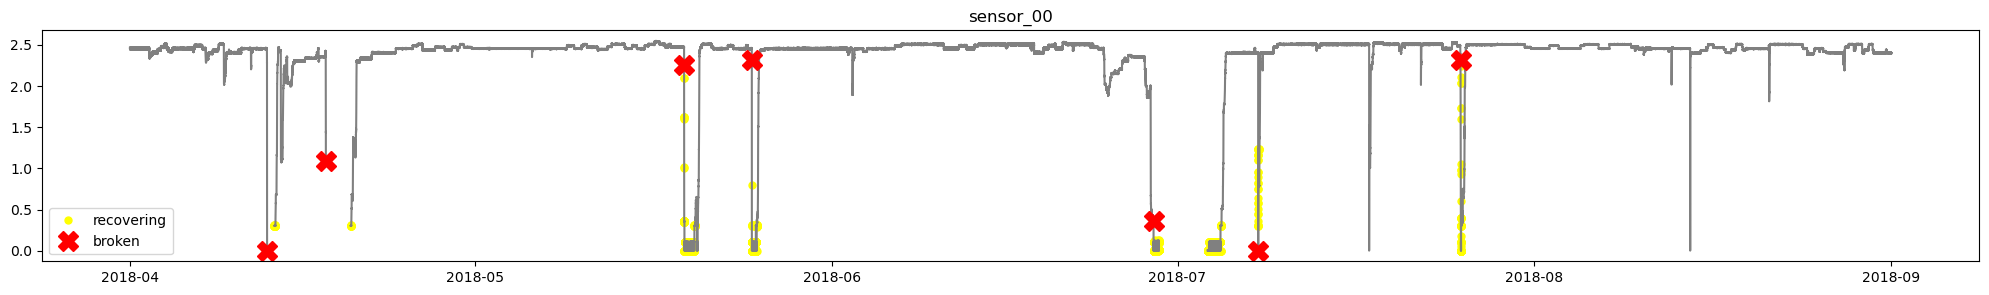

In [15]:
plot_sensor('sensor_00')


In [16]:
#Preprocess for machine learning
#Drop the machine status column
X = df.drop('machine_status', axis=1)
#Fill the missing values with the mean
X = X.fillna(df.mean())
X.shape




/var/folders/s6/jg0w44yd6ys1xqmywmt6434h0000gn/T/ipykernel_16702/2342861578.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = X.fillna(df.mean())


(220320, 51)

In [17]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outliers_fraction = 1 - (len(normal_rows)/(len(df))) 

anomaly_algorithms = [
    ("Isolation Forest",IsolationForest(contamination=outliers_fraction, n_jobs = -1)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction)),
    ("Local Outlier Factor",LocalOutlierFactor(contamination=outliers_fraction, n_jobs = -1)),
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction))]

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ## fit the models: Mind you this takes a lot of time!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
for name, algorithm in anomaly_algorithms:
    print(algorithm)

    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X)
    else:
        y_pred = algorithm.fit(X).predict(X)
    
    df[f'{name}'] = y_pred
    print('-'*100)
    print(f'number of anomolies detected')
    print(df[f'{name}'].value_counts())
    print('-'*100)

IsolationForest(contamination=0.06574074074074077, n_jobs=-1)


/Users/Hesam_1/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    205836
-1     14484
Name: Isolation Forest, dtype: int64
----------------------------------------------------------------------------------------------------
OneClassSVM(nu=0.06574074074074077)
----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    205829
-1     14491
Name: One-Class SVM, dtype: int64
----------------------------------------------------------------------------------------------------
LocalOutlierFactor(contamination=0.06574074074074077, n_jobs=-1)
----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    205836
-1     14484
Name: Local Outlier Factor, dtype: int64
----------------------------------------------------------------------------------------------------
EllipticEnvelope

In [18]:
def plot_sensor_anomolies(sensor, name):
    anomoly_rows = df[df[f'{name}'] == -1]
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(df[sensor], color='grey')
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering',alpha = 0.5)
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=20, label='broken')
    plot = plt.plot(anomoly_rows[sensor], linestyle='none', marker='X', color='blue', markersize=4, label='anomoly predicted', alpha = 0.1)
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show();

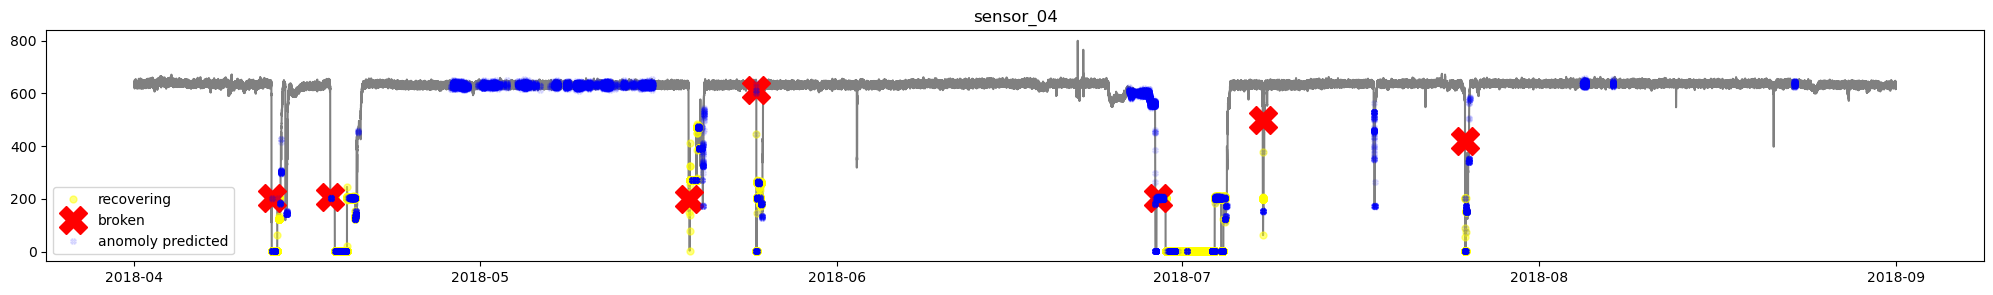

In [54]:
plot_sensor_anomolies('sensor_04', 'Isolation Forest')


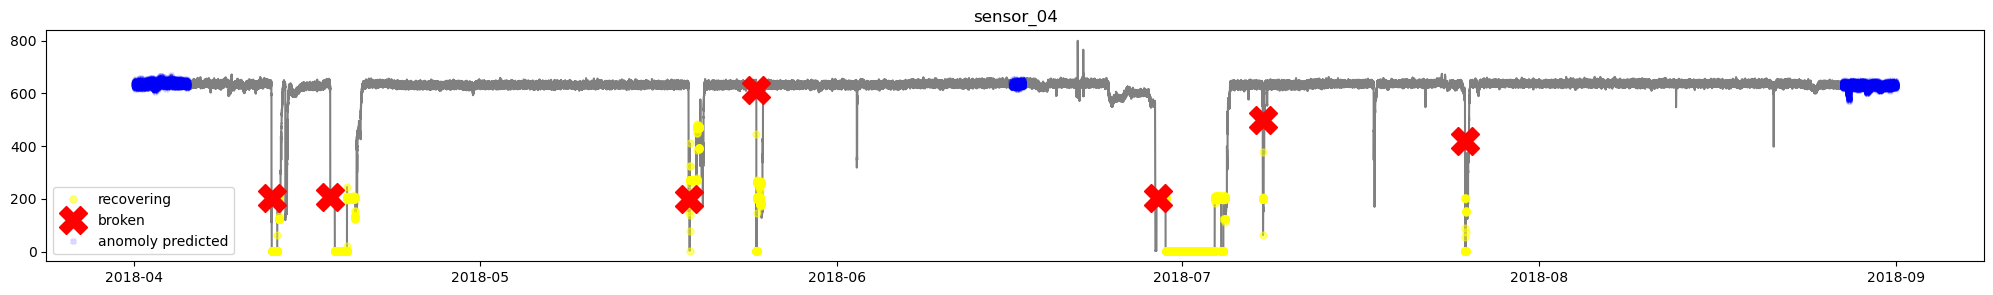

In [55]:
plot_sensor_anomolies('sensor_04', 'One-Class SVM')


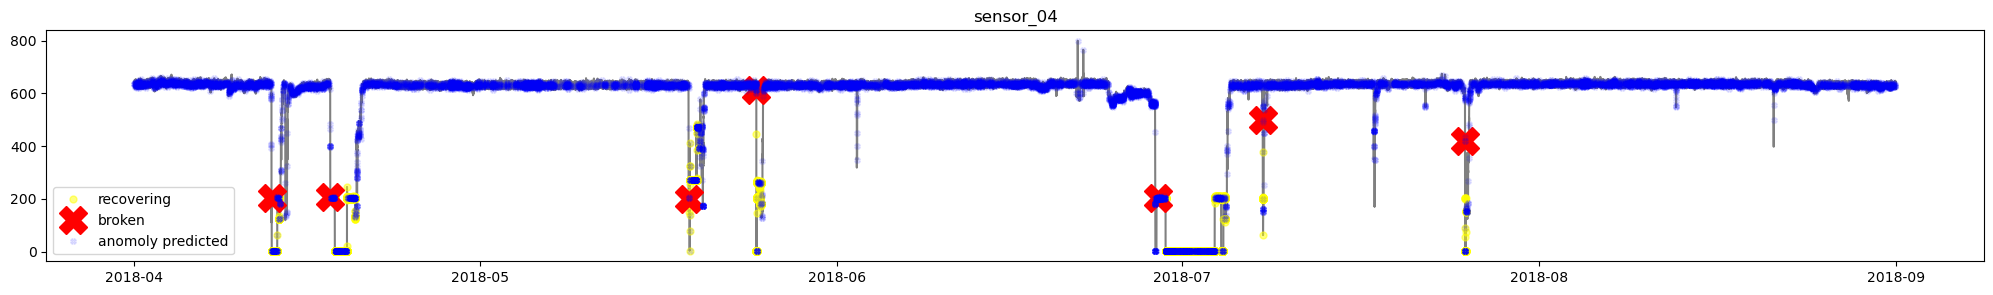

In [56]:
plot_sensor_anomolies('sensor_04', 'Local Outlier Factor')

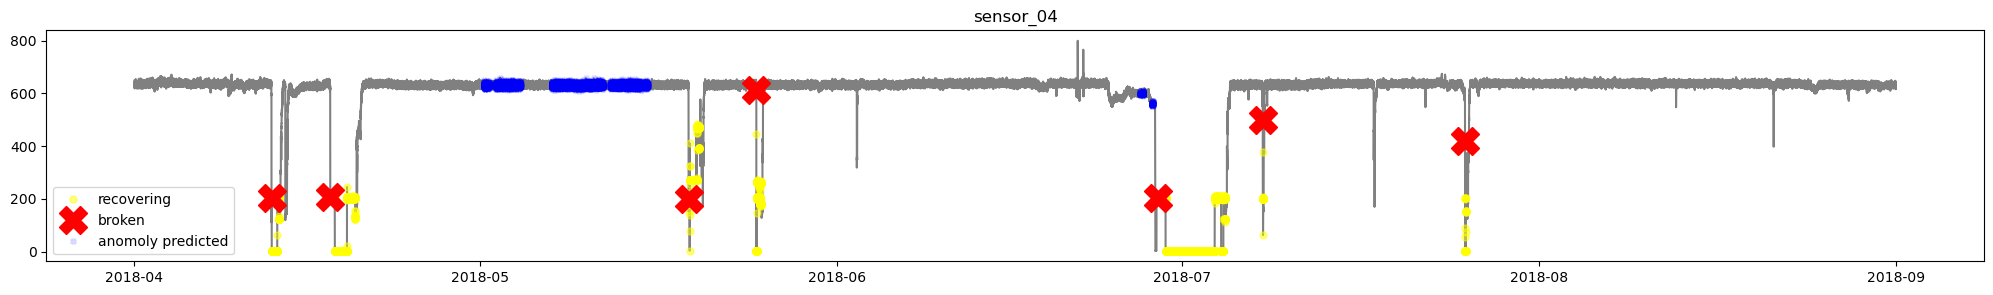

In [57]:
plot_sensor_anomolies('sensor_04', 'Robust covariance')

In [60]:
from pyculiarity import detect_ts
import pandas as pd

In [64]:
from sklearn.covariance import EllipticEnvelope

# Define the anomaly detection method
ee = EllipticEnvelope(contamination=0.02)  # Adjust contamination as per dataset

# Fit the model on your dataset
ee.fit(X)

# Predict the anomalies in the data
y_pred = ee.predict(X)

# Anomalies are denoted by -1, normal data points are denoted by 1
anomalies = X[pred == -1]
df['EllipticEnvelope'] = y_pred
print('-'*100)
print(f'number of anomolies detected')
print(df['EllipticEnvelope'].value_counts())
print('-'*100)


----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    215913
-1      4407
Name: EllipticEnvelope, dtype: int64
----------------------------------------------------------------------------------------------------


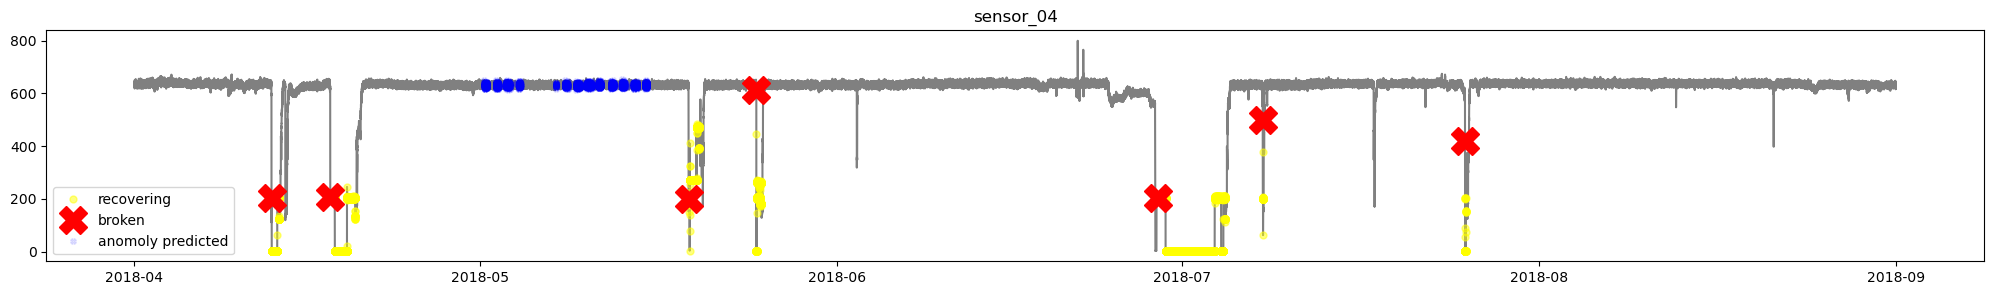

In [65]:
plot_sensor_anomolies('sensor_04', 'EllipticEnvelope')

In [23]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest


# Define the anomaly detection method
# Initialize and fit the model
model = IsolationForest(n_estimators=50, max_samples='auto', contamination=0.003, bootstrap=False)
model.fit(X)



# Predict the anomalies in the data
y_pred = model.predict(X)

# Anomalies are denoted by -1, normal data points are denoted by 1

df['IsolationForest1'] = y_pred
print('-'*100)
print(f'number of anomolies detected')
print(df['IsolationForest1'].value_counts())
print('-'*100)


/Users/Hesam_1/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
number of anomolies detected
 1    219659
-1       661
Name: IsolationForest1, dtype: int64
----------------------------------------------------------------------------------------------------


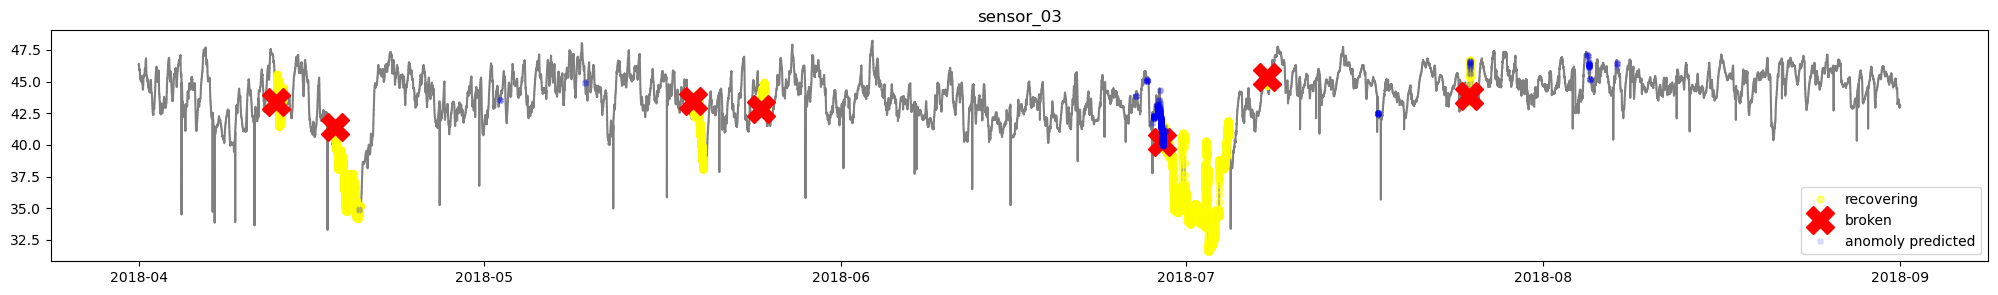

In [24]:
plot_sensor_anomolies('sensor_03', 'IsolationForest1')

In [ ]:
from sklearn.ensemble import IsolationForest

# Define the parameter grid
n_estimators = [50, 100, 150, 200]
max_samples = ['auto', 0.5, 0.75, 0.9]
contamination = [0.1, 0.2, 0.3]
bootstrap = [True, False]

# Define the sensor names. Replace with your actual sensor names.
sensors = ["sensor_01", "sensor_02", "sensor_03"]

# Loop over each sensor
for sensor in sensors:

    # Loop over each combination of hyperparameters
    for estimators in n_estimators:
        for samples in max_samples:
            for contam in contamination:
                for boot in bootstrap:

                    # Initialize and fit the model
                    model = IsolationForest(n_estimators=estimators, max_samples=samples, contamination=contam, bootstrap=boot)
                    model.fit(X)

                    # Assign the anomaly prediction to the DataFrame
                    df[f'{sensor}_anomaly'] = model.predict(X)

                    # Plot anomalies detected by this model
                    plot_sensor_anomolies(sensor, f'{sensor}_anomaly')